# DA - NCAA - Exploration of data
In this playground, we are going to explore all the historical data and clean the data.

In [1]:
# package requirement: numpy, pandas
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Read data

In [2]:
teams_df = pd.read_csv('dataset/Teams.csv')
rg_85_16_df = pd.read_csv('dataset/RegularSeasonCompactResults.csv')
rg_85_16_all_df = pd.read_csv('dataset/RegularSeasonDetailedResults.csv')
rg_17_df = pd.read_csv('dataset/2017_Final_CompactResults.csv')
rg_17_all_df = pd.read_csv('dataset/2017_Final_DetailedResults.csv')

rg_df = pd.concat([rg_85_16_df, rg_17_df])
pd.concat([rg_df.head(), rg_df.tail()])



Season  Daynum  Wteam  Wscore  Lteam  Lscore Wloc  Numot
0       1985      20   1228      81   1328      64    N      0
1       1985      25   1106      77   1354      70    H      0
2       1985      25   1112      63   1223      56    H      0
3       1985      25   1165      70   1432      54    H      0
4       1985      25   1192      86   1447      74    H      0
5390    2017     132   1276      71   1458      56    N      0
5391    2017     132   1343      71   1463      59    N      0
5392    2017     132   1348      70   1433      63    N      0
5393    2017     132   1374      71   1153      56    N      0
5394    2017     132   1407      59   1402      53    N      0

In [3]:
rg_all_df = pd.concat([rg_85_16_all_df, rg_17_all_df])
pd.concat([rg_all_df.head(), rg_all_df.tail()])

Season  Daynum  Wteam  Wscore  Lteam  Lscore Wloc  Numot  Wfgm  Wfga  \
0       2003      10   1104      68   1328      62    N      0    27    58   
1       2003      10   1272      70   1393      63    N      0    26    62   
2       2003      11   1266      73   1437      61    N      0    24    58   
3       2003      11   1296      56   1457      50    N      0    18    38   
4       2003      11   1400      77   1208      71    N      0    30    61   
5390    2017     132   1276      71   1458      56    N      0    27    48   
5391    2017     132   1343      71   1463      59    N      0    25    52   
5392    2017     132   1348      70   1433      63    N      0    24    54   
5393    2017     132   1374      71   1153      56    N      0    26    52   
5394    2017     132   1407      59   1402      53    N      0    21    60   

     ...   Lfga3  Lftm  Lfta  Lor  Ldr  Last  Lto  Lstl  Lblk  Lpf  
0    ...      10    16    22   10   22     8   18     9     2   20  
1    ...      24     9    20   20   25     7   12     8     6   16  
2    ...      26    14    23   31   22     9   12     2     5   23  
3    ...      22     8    15   17   20     9   19     4     3   23  
4    ...      16    17    27   21   15    12   10     7     1   14  
5390 ...      15     6     8   14   18    10   15     4     3   13  
5391 ...      20    13    19   14   20    12    7     4     5   13  
5392 ...      14    17    22   23   24     8    5     4     1   16  
5393 ...      24    14    18   17   22     7    7     7     1   13  
5394 ...      17     7     8    9   27    10   17     1     7   18  

[10 rows x 34 columns]

## Check missing value

In [4]:
for d in rg_all_df:
    print(d + ": " + str(rg_all_df[d].isnull().values.any()))

Season: False
Daynum: False
Wteam: False
Wscore: False
Lteam: False
Lscore: False
Wloc: False
Numot: False
Wfgm: False
Wfga: False
Wfgm3: False
Wfga3: False
Wftm: False
Wfta: False
Wor: False
Wdr: False
Wast: False
Wto: False
Wstl: False
Wblk: False
Wpf: False
Lfgm: False
Lfga: False
Lfgm3: False
Lfga3: False
Lftm: False
Lfta: False
Lor: False
Ldr: False
Last: False
Lto: False
Lstl: False
Lblk: False
Lpf: False


In [5]:
rg_all_df[['Season', 'Daynum', 'Lteam','Lscore',
                                       'Wloc','Numot','Lfgm','Lfga','Lfgm3',
                                       'Lfga3','Lftm','Lfta','Lor','Ldr',
                                       'Last','Lto','Lstl','Lblk','Lpf']]

Season  Daynum  Lteam  Lscore Wloc  Numot  Lfgm  Lfga  Lfgm3  Lfga3  \
0       2003      10   1328      62    N      0    22    53      2     10   
1       2003      10   1393      63    N      0    24    67      6     24   
2       2003      11   1437      61    N      0    22    73      3     26   
3       2003      11   1457      50    N      0    18    49      6     22   
4       2003      11   1208      71    N      0    24    62      6     16   
5       2003      11   1186      55    H      0    20    46      3     11   
6       2003      12   1236      62    H      0    19    41      4     15   
7       2003      12   1457      61    N      0    20    59      4     17   
8       2003      12   1156      66    N      0    24    52      6     18   
9       2003      12   1296      56    H      0    23    52      3     14   
10      2003      13   1426      50    H      0    17    52      4     11   
11      2003      13   1106      73    N      0    29    63     10     22   
12      2003      13   1135      65    N      0    24    56      6     19   
13      2003      13   1125      48    H      0    18    64      8     24   
14      2003      14   1135      77    N      1    28    60      4     15   
15      2003      14   1236      71    N      0    23    50      7     20   
16      2003      14   1194      56    H      0    21    65      2     13   
17      2003      14   1202      57    H      0    23    55      2     11   
18      2003      14   1129      59    A      0    21    51      3     14   
19      2003      14   1336      55    H      0    21    71      3     23   
20      2003      14   1237      45    H      0    18    74      4     15   
21      2003      14   1162      36    H      0    12    39      3      8   
22      2003      14   1131      57    H      0    19    54      3     17   
23      2003      14   1106      47    N      0    20    60      6     18   
24      2003      14   1389      48    H      0    20    63      7     20   
25      2003      15   1156      63    H      0    23    51      3     13   
26      2003      15   1236      86    N      2    27    58     14     31   
27      2003      15   1256      55    H      0    19    49      1      5   
28      2003      15   1221      57    H      0    18    52      7     21   
29      2003      15   1447      65    H      0    26    70      3     25   
...      ...     ...    ...     ...  ...    ...   ...   ...    ...    ...   
5365    2017     131   1163      71    N      0    22    56      7     19   
5366    2017     131   1323      69    N      0    27    67      6     25   
5367    2017     131   1452      74    N      0    29    56      8     23   
5368    2017     131   1103      65    N      0    26    57      6     22   
5369    2017     131   1104      74    N      0    28    62      3     14   
5370    2017     131   1278      77    N      0    31    67      3     13   
5371    2017     131   1267      72    N      0    27    69     10     32   
5372    2017     131   1313      59    N      0    23    65      7     20   
5373    2017     131   1161      71    N      0    27    71     11     33   
5374    2017     131   1167      60    N      0    23    56      4     14   
5375    2017     131   1394      65    N      1    22    47      6     19   
5376    2017     131   1451      89    N      1    25    57      8     21   
5377    2017     131   1335      64    N      1    26    64      8     27   
5378    2017     131   1172      60    N      0    19    48      5     21   
5379    2017     131   1416      59    N      0    20    49     10     26   
5380    2017     131   1426      62    N      0    22    56      8     26   
5381    2017     131   1209      63    N      0    21    58      6     22   
5382    2017     131   1108      50    N      0    19    57      3     15   
5383    2017     131   1414      47    N      0    19    50      3     12   
5384    2017     131   1350      77    N      1    26    61     10     22   
53

In [6]:
rg_all_plain_w_df = rg_all_df[['Season', 'Daynum', 'Wteam','Wscore',
                             'Wloc','Numot','Wfgm','Wfga','Wfgm3',
                             'Wfga3','Wftm','Wfta','Wor','Wdr',
                             'Wast','Wto','Wstl','Wblk','Wpf']]
rg_all_plain_l_df = rg_all_df[['Season', 'Daynum', 'Lteam','Lscore',
                               'Wloc','Numot','Lfgm','Lfga','Lfgm3',
                               'Lfga3','Lftm','Lfta','Lor','Ldr',
                               'Last','Lto','Lstl','Lblk','Lpf']]
rg_all_plain_w_df.columns = ['Season', 'Daynum', 'Team','Score',
                             'Loc','Numot','Fgm','Fga','Fgm3',
                             'Fga3','Ftm','Fta','Or','Dr',
                             'Ast','To','Stl','Blk','Pf']
rg_all_plain_l_df.columns = ['Season', 'Daynum', 'Team','Score',
                             'Loc','Numot','Fgm','Fga','Fgm3',
                             'Fga3','Ftm','Fta','Or','Dr',
                             'Ast','To','Stl','Blk','Pf']
rg_all_plain_l_df['Result'] = 0
rg_all_plain_w_df['Result'] = 1
rg_all_plain_df = pd.concat([rg_all_plain_w_df,rg_all_plain_l_df])

/Users/cyy/env/ds/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/cyy/env/ds/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [7]:
rg_all_plain_df

Season  Daynum  Team  Score Loc  Numot  Fgm  Fga  Fgm3  Fga3  Ftm  Fta  \
0       2003      10  1104     68   N      0   27   58     3    14   11   18   
1       2003      10  1272     70   N      0   26   62     8    20   10   19   
2       2003      11  1266     73   N      0   24   58     8    18   17   29   
3       2003      11  1296     56   N      0   18   38     3     9   17   31   
4       2003      11  1400     77   N      0   30   61     6    14   11   13   
5       2003      11  1458     81   H      0   26   57     6    12   23   27   
6       2003      12  1161     80   H      0   23   55     2     8   32   39   
7       2003      12  1186     75   N      0   28   62     4    14   15   21   
8       2003      12  1194     71   N      0   28   58     5    11   10   18   
9       2003      12  1458     84   H      0   32   67     5    17   15   19   
10      2003      13  1166    106   H      0   41   69    15    25    9   13   
11      2003      13  1202     74   N      0   29   51     7    13    9   11   
12      2003      13  1237     66   N      0   26   66     5    19    9   13   
13      2003      13  1323     76   H      0   25   56    10    23   16   23   
14      2003      14  1125     83   N      1   30   70    11    31   12   15   
15      2003      14  1156     78   N      0   27   46    10    18   14   24   
16      2003      14  1161     81   H      0   22   48     5    12   32   43   
17      2003      14  1166     82   H      0   33   61     8    19    8   14   
18      2003      14  1183     73   A      0   29   59     9    19    6    8   
19      2003      14  1314     85   H      0   32   60     5    15   16   23   
20      2003      14  1323     89   H      0   34   62     8    16   13   21   
21      2003      14  1353     60   H      0   23   57     4    19   10   15   
22      2003      14  1390     61   H      0   20   53     6    27   15   24   
23      2003      14  1426     59   N      0   25   53     1     5    8   12   
24      2003      14  1462     87   H      0   35   70     6    19   11   16   
25      2003      15  1161     77   H      0   27   58     5    10   18   27   
26      2003      15  1194     93   N      2   33   75     9    20   18   33   
27      2003      15  1196     76   H      0   28   48     4    13   16   24   
28      2003      15  1242     81   H      0   28   53     3     5   22   37   
29      2003      15  1422     84   H      0   33   53     3     8   15   20   
...      ...     ...   ...    ...  ..    ...  ...  ...   ...   ...  ...  ...   
5365    2017     131  1163     71   N      0   22   56     7    19   20   25   
5366    2017     131  1323     69   N      0   27   67     6    25    9   12   
5367    2017     131  1452     74   N      0   29   56     8    23    8   17   
5368    2017     131  1103     65   N      0   26   57     6    22    7   13   
5369    2017     131  1104     74   N      0   28   62     3    14   15   20   
5370    2017     131  1278     77   N      0   31   67     3    13   12   14   
5371    2017     131  1267     72   N      0   27   69    10    32    8   12   
5372    2017     131  1313     59   N      0   23   65     7    20    6    6   
5373    2017     131  1161     71   N      0   27   71    11    33    6   11   
5374    2017     131  1167     60   N      0   23   56     4    14   10   15   
5375    2017     131  1394     65   N      1   22   47     6    19   15   19   
5376    2017     131  1451     89   N      1   25   57     8    21   31   39   
5377    2017     131  1335     64   N      1   26   64     8    27    4    5   
5378    2017     131  1172     60   N      0   19   48     5    21   17   23   
5379    2017     131  1416     59   N      0   20   49    10    26    9   11   
5380    2017     131  1426     62   N      0   22   56     8    26   10   13   
5381    2017     131  1209     63   N      0   21   58     6    22   15   21   
5382    2017     131  1108     50   N      0   19   57     3    15    9   16   
5383  

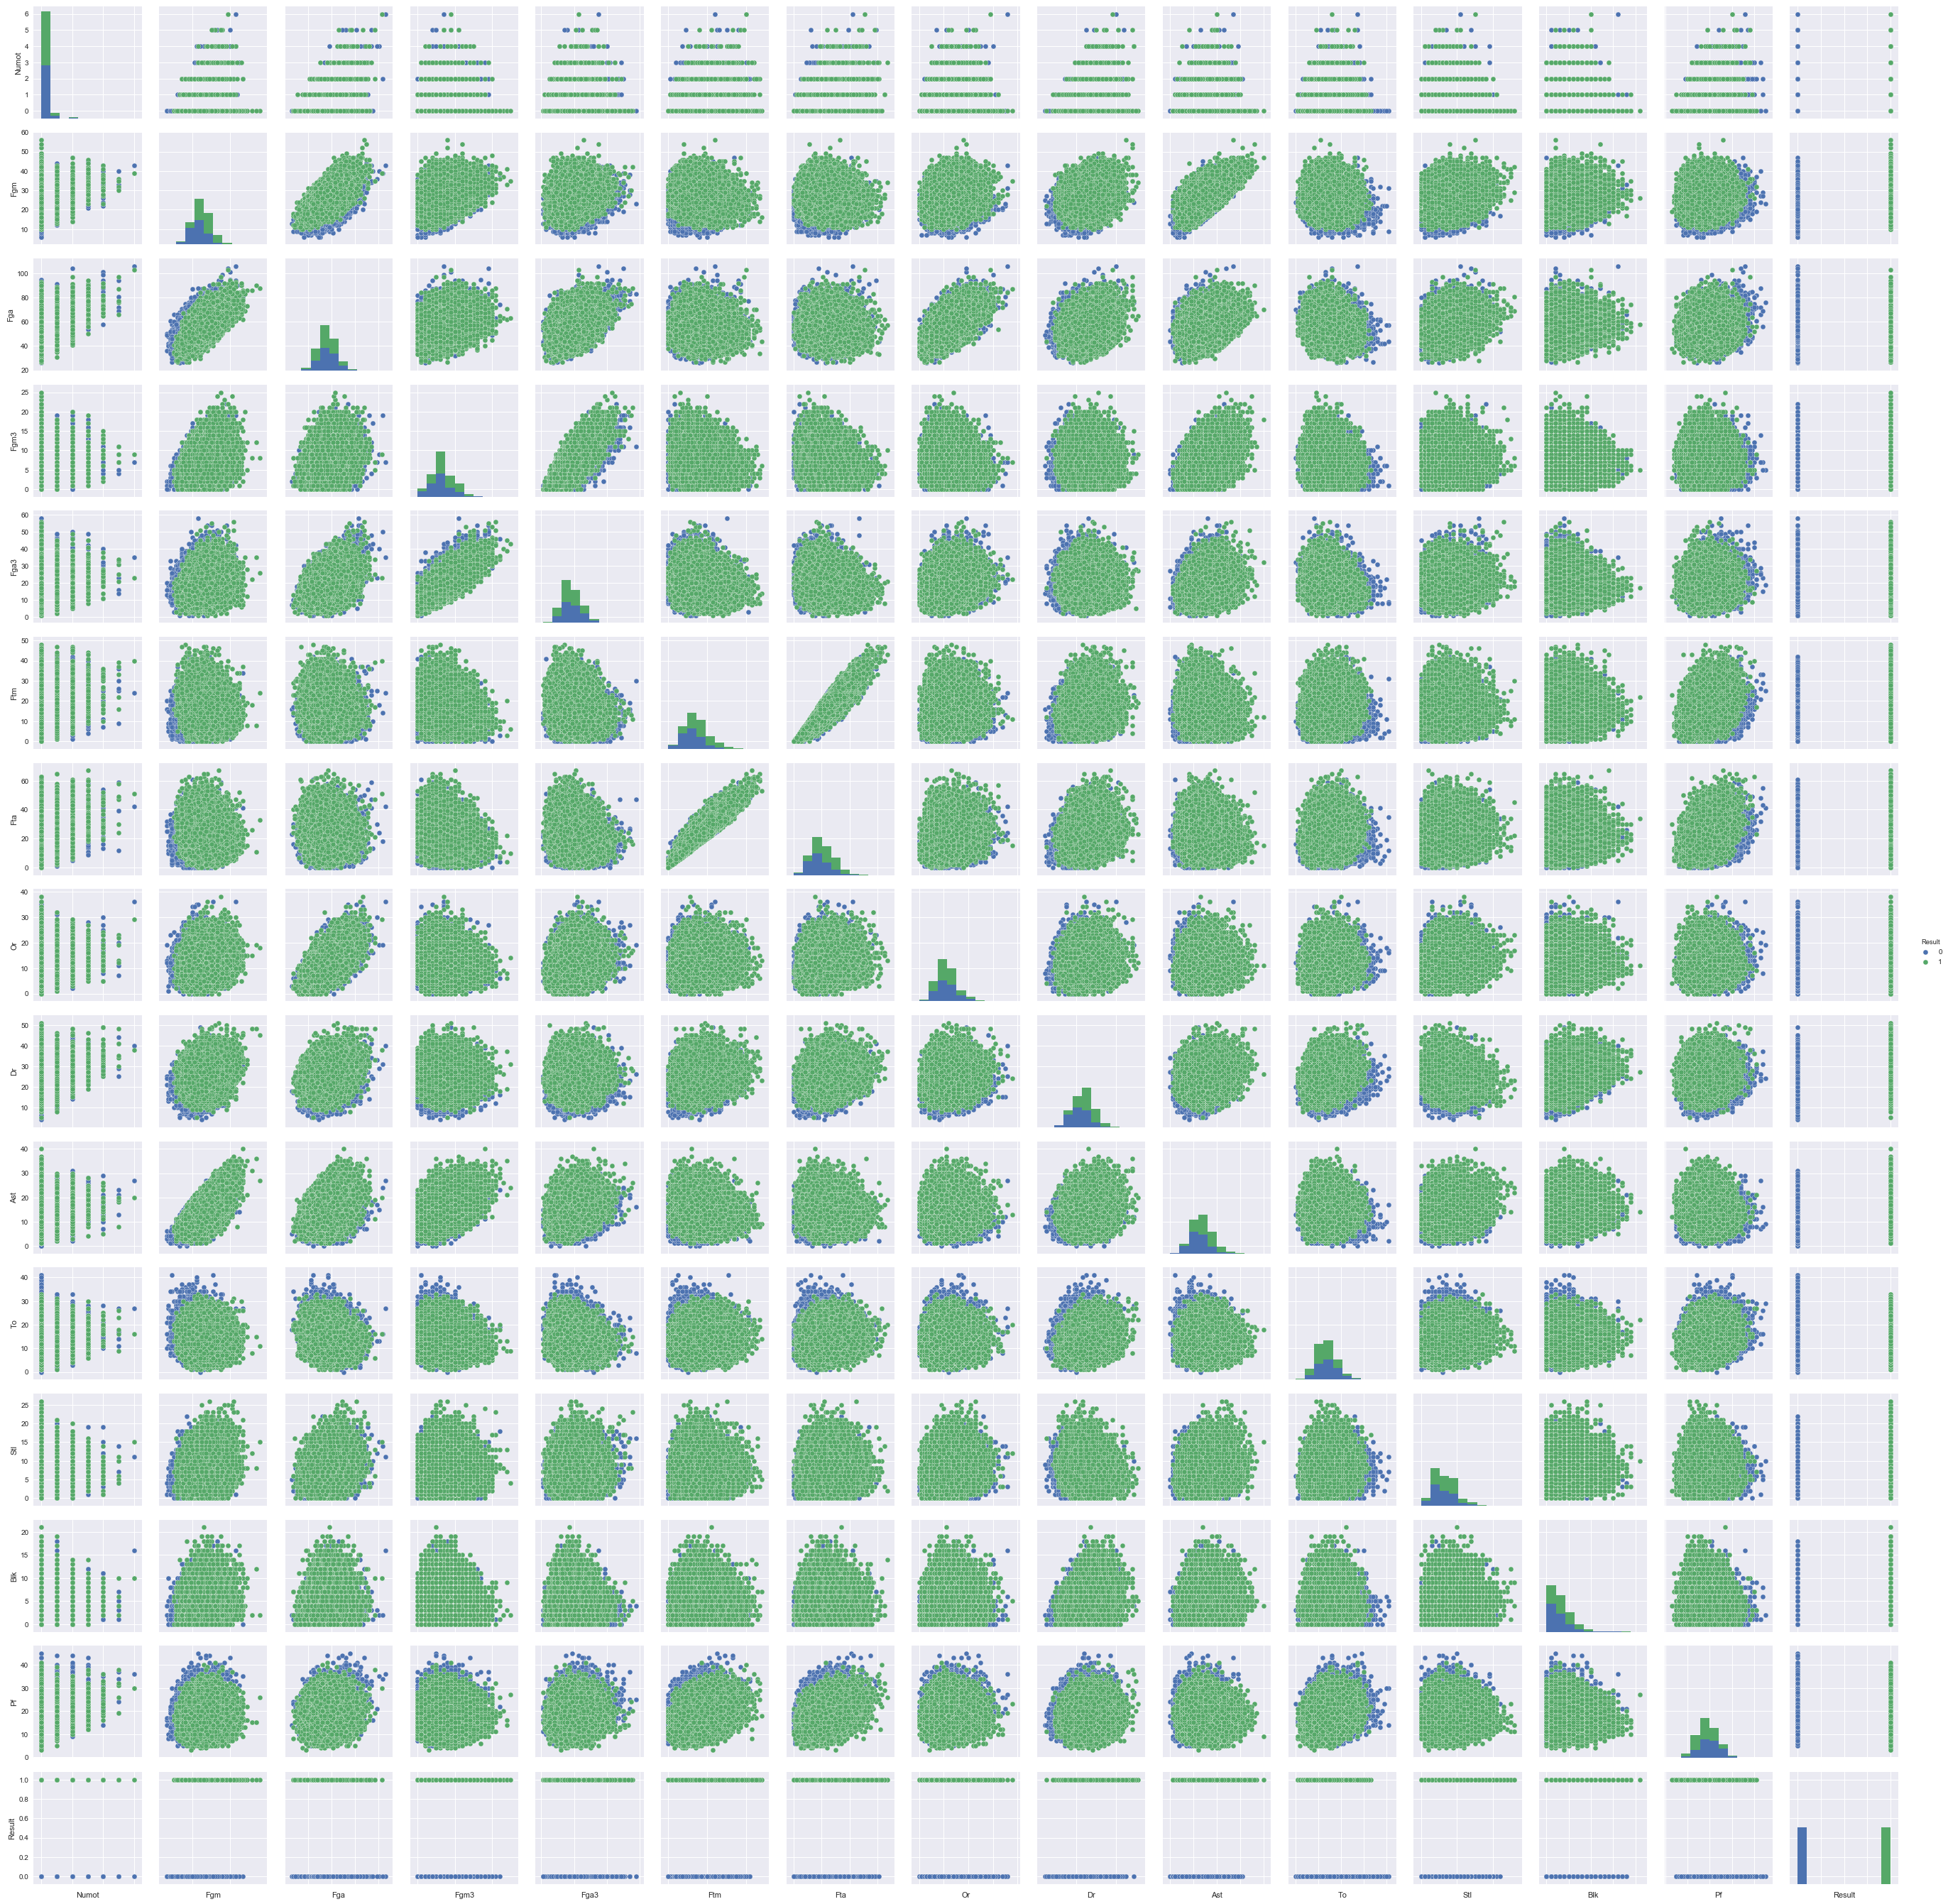

In [8]:
g = sns.pairplot(rg_all_plain_df[[
                             'Loc','Numot','Fgm','Fga','Fgm3',
                             'Fga3','Ftm','Fta','Or','Dr',
                             'Ast','To','Stl','Blk','Pf','Result']], hue='Result')
g.set(xticklabels=[])